(c) Choose the configuration (activation and initial learning rate) that gave best validation accuracy. Train this for all 60,000 images = training + validation. Remember to apply a learning rate decay as before. After all 50 epochs are done test with the data in mnist testdata.hdf5 from the previous problem. Record the final test accuracy.

In [ ]:
# Importing the necessary libraries. 
import h5py
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Extracting the data from the file.
open_file = 'mnist_traindata.hdf5'
with h5py.File(open_file, 'r') as columns:
    file_datacols = np.array(columns)
    print(file_datacols)

In [ ]:
# Converting the data to an array.
open_file = 'mnist_traindata.hdf5' # Training dataset.
with h5py.File(open_file, 'r') as columns:
    xdata = np.float32(np.array(columns['xdata']))
    ydata = np.float32(np.array(columns['ydata']))
print('Dimensions of xdata: ', xdata.shape)
print('Dimensions of ydata: ', ydata.shape)

open_file = 'mnist_testdata.hdf5' # Testing dataset.
with h5py.File(open_file, 'r') as columns:
    xdatatest = np.float32(np.array(columns['xdata']))
    ydatatest = np.float32(np.array(columns['ydata']))

print("The dimensions of xdataset: ", xdatatest.shape)

In [ ]:
def ReLU(x):
    y = np.zeros([len(x),])
    
    for i in range(len(x)):
        
        if x[i] < 0:
            y[i] = 0
        else:
            y[i] = x[i]
    
    return y

def cond_ReLU(x):
    return (x > 0) * 1

In [ ]:
def Soft_Max(x):
    x -= np.max(x)
    numerator = np.float32(np.exp(x))
    denominator = np.sum(numerator, axis = 0)
    prediction = numerator / denominator
    
    return prediction

In [ ]:
# Function parameter: w1, w2 and w3 -> weight values; b1, b2 and b3 -> bias values; batch_size -> batch for the epoch; learn_rate -> learning rate; x and y -> dataset elements.
def ReLU_training(w1, w2, w3, b1, b2, b3, batch_size, learn_rate, x, y):
    samples, data = x.shape
    weights1 = np.zeros([w1.shape[0], w1.shape[1]])
    weights2 = np.zeros([w2.shape[0], w2.shape[1]])
    weights3 = np.zeros([w3.shape[0], w3.shape[1]])
    bias1 = np.zeros([b1.shape[0],])
    bias2 = np.zeros([b2.shape[0],])
    bias3 = np.zeros([b3.shape[0],])
    accuracy = 0

    for i in range(samples):
        xi = x[i]
        # Activation function calculation:
        act_relu1 = ReLU(np.matmul(w1, xi) + b1)
        act_relu2 = ReLU(np.matmul(w2, act_relu1) + b2)
        act_relu3 = Soft_Max(np.matmul(w3, act_relu2) + b3)
        
        if np.argmax(act_relu3) == np.argmax(y[i]):
            accuracy += 1

        # Computation of deltas:
        delta_3 = act_relu3 - y[i]
        weights3 = weights3 + np.outer(delta_3, act_relu2.T)
        bias3 += delta_3
        delta_2 = np.matmul(w3.T, delta_3) * cond_ReLU(act_relu2)
        weights2 = weights2 + np.outer(delta_2, act_relu1.T)
        bias2 += delta_2
        delta_1 = np.matmul(w2.T, delta_2) * cond_ReLU(act_relu1)
        weights1 = weights1 + np.outer(delta_1, xi.T)
        bias1 += delta_1

        if (i + 1) % batch_size == 0:
            w1 -= learn_rate * (weights1 / batch_size)
            w2 -= learn_rate * (weights2 / batch_size)
            w3 -= learn_rate * (weights3 / batch_size)
            b1 -= learn_rate * (bias1 / batch_size)
            b2 -= learn_rate * (bias2 / batch_size)
            b3 -= learn_rate * (bias3 / batch_size)
            weights1 = np.zeros([w1.shape[0], w1.shape[1]])
            weights2 = np.zeros([w2.shape[0], w2.shape[1]])
            weights3 = np.zeros([w3.shape[0], w3.shape[1]])
            bias1 = np.zeros([b1.shape[0],])
            bias2 = np.zeros([b2.shape[0],])
            bias3 = np.zeros([b3.shape[0],])

    return w1, w2, w3, b1, b2, b3, accuracy / samples 

# Function parameter: w1, w2 and w3 -> weight values; b1, b2 and b3 -> bias values; x and y -> dataset elements.
def ReLU_forwardpropagation(w1, w2, w3, b1, b2, b3, x, y):
    samples, data = x.shape
    accuracy = 0
    
    for i in range(samples):
        xi = x[i]
        # Activation function calculation:
        act_relu1 = ReLU(np.matmul(w1, xi) + b1)
        act_relu2 = ReLU(np.matmul(w2, act_relu1) + b2)
        act_relu3 = Soft_Max(np.matmul(w3, act_relu2) + b3)

        if np.argmax(y[i]) == np.argmax(act_relu3):
            accuracy += 1

    return accuracy / samples

The best network is ReLU with- learning rate of 0.05, batch size of 50, normally distributed weights and bias.

In [ ]:
epochRelu2 = 50
learnrate_1 = 14
learnrate_2 = 34
batch_size = 50
# Network configuration & parameter initialization: 2 layers with 200 neurons in the first layer and 100 neurons in the second layer.
w1_Relu2 = np.random.normal(0, 0.001, [200, 784])
w2_Relu2 = np.random.normal(0, 0.001, [100, 200])
w3_Relu2 = np.random.normal(0, 0.001, [10, 100])
b1_Relu2 = np.random.normal(0, 0.001, [200,])
b2_Relu2 = np.random.normal(0, 0.001, [100,])
b3_Relu2 = np.random.normal(0, 0.001, [10,])
learnrate_Relu2 = 0.05
training_accuracy_Relu2 = []

for i in range(epochRelu2):
    w1_Relu2, w2_Relu2, w3_Relu2, b1_Relu2, b2_Relu2, b3_Relu2, train_accuracy = ReLU_training(w1_Relu2, w2_Relu2, w3_Relu2, b1_Relu2, b2_Relu2, b3_Relu2, batch_size, learnrate_Relu2, xdata, ydata)

    if i == learnrate_1 or i == learnrate_2: # Dividing the epoch value by 2 after 14th & 34th epoch.
        learnrate_2 /= 2

    training_accuracy_Relu2.append(train_accuracy)

test_accuracy = ReLU_forwardpropagation(w1_Relu2, w2_Relu2, w3_Relu2, b1_Relu2, b2_Relu2, b3_Relu2, xdatatest, ydatatest)

• Final test accuracy for the best network

Final Train Accuracy: 1.0
Final Test Accuracy: 0.9824


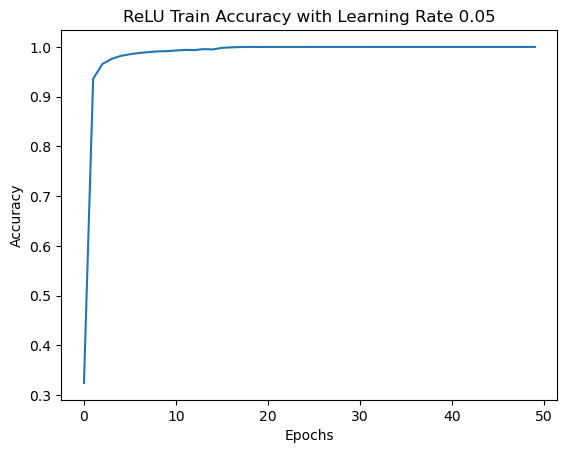

In [ ]:
print("Final Train Accuracy:", training_accuracy_Relu2[epochRelu2 - 1])
print("Final Test Accuracy:", test_accuracy)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("ReLU Train Accuracy with Learning Rate 0.05")
plt.plot(range(epochRelu2), training_accuracy_Relu2[epochRelu2 - 1])
plt.show()

It is evident from the above graph that the selected network is the best among the lot as the train accuracy achieved is 100% and test accuracy is 98.24%